In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

import dataplot
import dataprep

In [2]:
# PP
df_1, list_1 = dataprep.plotprep('../Data/LSB/7_17_19/_006_6.xls', 8)

Rest step removed
Reverse Mode: First cycle contains only initial discharge
111 complete cycles after intial discharge
Final cycle only contains charge data


In [3]:
# PEO_PVDF
df_2, list_2 = dataprep.plotprep('../Data/LSB/7_17_19/_005_3.xls', 7)

Rest step removed
Reverse Mode: First cycle contains only initial discharge
112 complete cycles after intial discharge


In [4]:
# PENDI
df_3, list_3 = dataprep.plotprep('../Data/LSB/7_17_19/_007_3.xls', 6)

Rest step removed
Reverse Mode: First cycle contains only initial discharge
82 complete cycles after intial discharge
Final cycle only contains charge data


In [17]:
# PEDOT
df_4, list_4 = dataprep.plotprep('../Data/LSB/7_17_19/_004_2.xls', 1)

Rest step removed
Reverse Mode: First cycle contains only initial discharge
11 complete cycles after intial discharge


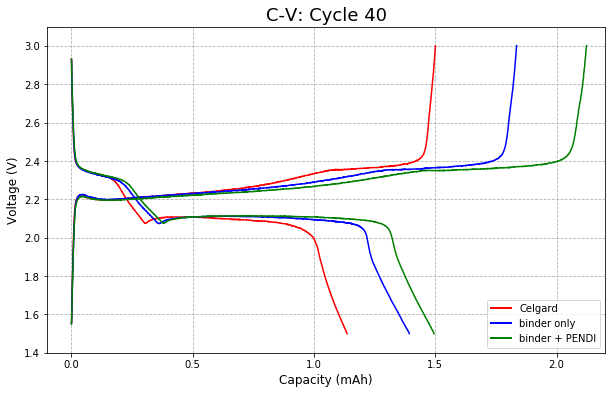

In [31]:
fig, ax = plt.subplots(figsize=(10,6))
ax.set_xlim(-0.1, 2.2)
ax.set_ylim(1.4, 3.1)
ax.set_title('C-V: Cycle 40', fontsize=18)
ax.set_xlabel('Capacity (mAh)', fontsize=12)
ax.set_ylabel('Voltage (V)', fontsize=12)
ax.grid(which='major', axis='both', linestyle='--')

input_list = [40]

dataplot.cv_plot(ax, df_1, list_1, input_list, plot_color='red')
dataplot.cv_plot(ax, df_2, list_2, input_list, plot_color='blue')
dataplot.cv_plot(ax, df_3, list_3, input_list, plot_color='green')
# dataplot.cv_plot(ax, df_4, list_4, input_list, plot_color='orange')

custom_lines = [Line2D([0], [0], color='red', lw=2),
               Line2D([0], [0], color='blue', lw=2),
               Line2D([0], [0], color='green', lw=2)]
#                Line2D([0], [0], color='orange', lw=2)]
ax.legend(custom_lines, ['Celgard', 'binder only', 'binder + PENDI'])#, 'PENDI + PEDOT'])

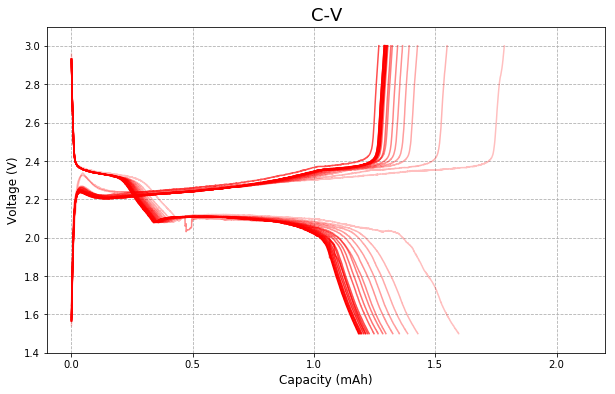

In [15]:
fig, ax = plt.subplots(figsize=(10,6))
ax.set_xlim(-0.1, 2.2)
ax.set_ylim(1.4, 3.1)
ax.set_title('C-V', fontsize=18)
ax.set_xlabel('Capacity (mAh)', fontsize=12)
ax.set_ylabel('Voltage (V)', fontsize=12)
ax.grid(which='major', axis='both', linestyle='--')

# input_list = [5, 10, 15]
input_list = list(np.arange(2,20))

dataplot.cv_plot(ax, df_1, list_1, input_list, plot_color='red')